# Project Machine Learning with Python: Movie Recommender System
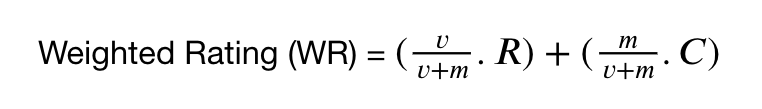

dimana,

- v: jumlah votes untuk film tersebut
- m: jumlah minimum votes yang dibutuhkan supaya dapat masuk dalam chart
- R: rata-rata rating dari film tersebut
- C: rata-rata jumlah votes dari seluruh semesta film

# Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from IPython.display import display

# Movie Dataset

In [ ]:
movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,\N,\N,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,\N,\N,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,\N,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,\N,\N,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,\N,\N,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,\N,\N,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,\N,\N,"Animation,Comedy,Drama",NaN


In [ ]:
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB
None


In [ ]:
columns_to_replace = ['startYear', 'endYear', 'runtimeMinutes', 'genres']
movie_df[columns_to_replace] = movie_df[columns_to_replace].replace('\\N', np.nan)

movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,NaN,NaN,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,NaN,NaN,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,NaN,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,NaN,NaN,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,NaN,NaN,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,NaN,NaN,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,NaN,NaN,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,NaN,NaN,NaN,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,NaN,NaN,"Animation,Comedy,Drama",NaN


In [ ]:
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       8352 non-null   object
 6   endYear         79 non-null     object
 7   runtimeMinutes  2601 non-null   object
 8   genres          8283 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB
None


In [ ]:
filtered_df = movie_df[(~movie_df['isAdult'].isin([0, 1])) & (movie_df['startYear'].isnull())]
movie_df.loc[filtered_df.index, ['isAdult', 'startYear']] = movie_df.loc[filtered_df.index, ['startYear', 'isAdult']].values

movie_df

<ipython-input-6-0d8f256106d8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  movie_df.loc[filtered_df.index, ['isAdult', 'startYear']] = movie_df.loc[filtered_df.index, ['startYear', 'isAdult']].values


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0.0,1898,NaN,NaN,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0.0,2018,NaN,NaN,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0.0,2016,NaN,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0.0,1987,NaN,NaN,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0.0,1973,NaN,NaN,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,NaN,2014,NaN,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,NaN,2015,NaN,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,NaN,2019,NaN,NaN,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,NaN,1994,NaN,"Animation,Comedy,Drama",NaN


In [ ]:
filtered_df = movie_df.loc[(movie_df['originalTitle'].isin(['0', '1'])) & (movie_df['isAdult'].isnull())]
movie_df.loc[filtered_df.index, ['originalTitle', 'isAdult']] = movie_df.loc[filtered_df.index, ['isAdult', 'originalTitle']].values

movie_df

<ipython-input-7-bb9fa4f7d70f>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  movie_df.loc[filtered_df.index, ['originalTitle', 'isAdult']] = movie_df.loc[filtered_df.index, ['isAdult', 'originalTitle']].values


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0.0,1898,NaN,NaN,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0.0,2018,NaN,NaN,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0.0,2016,NaN,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0.0,1987,NaN,NaN,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0.0,1973,NaN,NaN,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",NaN,0,2014,NaN,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,NaN,0,2015,NaN,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,NaN,0,2019,NaN,NaN,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,NaN,0,1994,NaN,"Animation,Comedy,Drama",NaN


In [ ]:
filtered_df = movie_df['runtimeMinutes'].apply(lambda x: type(x) != float) & movie_df['genres'].isnull()
movie_df.loc[filtered_df, ['runtimeMinutes', 'genres']] = movie_df.loc[filtered_df, ['genres', 'runtimeMinutes']].values

movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0.0,1898,NaN,NaN,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0.0,2018,NaN,NaN,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0.0,2016,NaN,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0.0,1987,NaN,NaN,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0.0,1973,NaN,NaN,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",NaN,0,2014,NaN,NaN,Reality-TV
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,NaN,0,2015,NaN,NaN,Reality-TV
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,NaN,0,2019,NaN,NaN,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,NaN,0,1994,NaN,NaN,"Animation,Comedy,Drama"


In [ ]:
movie_df['isAdult'] = pd.to_numeric(movie_df['isAdult'], errors='coerce')
movie_df['isAdult'] = movie_df['isAdult'].astype(int)
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,NaN,NaN,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,NaN,NaN,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,NaN,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,NaN,NaN,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,NaN,NaN,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",NaN,0,2014,NaN,NaN,Reality-TV
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,NaN,0,2015,NaN,NaN,Reality-TV
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,NaN,0,2019,NaN,NaN,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,NaN,0,1994,NaN,NaN,"Animation,Comedy,Drama"


In [ ]:
print(movie_df.isnull().sum())

tconst               0
titleType            0
primaryTitle        14
originalTitle       25
isAdult              0
startYear          662
endYear           8946
runtimeMinutes    6502
genres             664
dtype: int64


In [ ]:
movie_df['originalTitle'] = movie_df['originalTitle'].fillna(movie_df['primaryTitle'])
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,NaN,NaN,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,NaN,NaN,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,NaN,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,NaN,NaN,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,NaN,NaN,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...","I'm Not Going to Come Last, I'm Just Going to ...",0,2014,NaN,NaN,Reality-TV
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,NaN,NaN,Reality-TV
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,NaN,NaN,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,NaN,NaN,"Animation,Comedy,Drama"


In [ ]:
movie_df = movie_df.dropna(subset=['primaryTitle'])

In [ ]:
imputer = KNNImputer(n_neighbors=5)
movie_df.loc[:, ['startYear', 'runtimeMinutes']] = imputer.fit_transform(movie_df[['startYear', 'runtimeMinutes']]).astype(int)
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,NaN,45,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,NaN,23,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,NaN,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,NaN,50,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,NaN,53,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...","I'm Not Going to Come Last, I'm Just Going to ...",0,2014,NaN,42,Reality-TV
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,NaN,44,Reality-TV
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,NaN,23,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,NaN,45,"Animation,Comedy,Drama"


In [ ]:
movie_df['endYear'] = movie_df['endYear'].fillna(movie_df['startYear'])
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,1898,45,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,2018,23,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,2016,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,1987,50,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,1973,53,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...","I'm Not Going to Come Last, I'm Just Going to ...",0,2014,2014,42,Reality-TV
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,2015,44,Reality-TV
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,2019,23,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,1994,45,"Animation,Comedy,Drama"


In [ ]:
movie_df['genres'] = movie_df['genres'].fillna('Unknown')
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,1898,45,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,2018,23,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,2016,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,1987,50,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,1973,53,Documentary
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...","I'm Not Going to Come Last, I'm Just Going to ...",0,2014,2014,42,Reality-TV
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,2015,44,Reality-TV
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,2019,23,Unknown
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,1994,45,"Animation,Comedy,Drama"


In [ ]:
movie_df['runtimeHours'] = movie_df['runtimeMinutes'] // 60
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'] % 60

def format_runtime(row):
    if row['runtimeHours'] == 0:
        return f"{row['runtimeMinutes']} menit"
    elif row['runtimeMinutes'] == 0:
        return f"{row['runtimeHours']} jam"
    else:
        return f"{row['runtimeHours']} jam {row['runtimeMinutes']} menit"

movie_df['runtime'] = movie_df.apply(format_runtime, axis=1)
movie_df = movie_df.drop(['runtimeMinutes', 'runtimeHours'], axis=1)
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,runtime
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,1898,"Documentary,Short",45 menit
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,2018,"Comedy,Drama",23 menit
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,2016,"Comedy,Game-Show",29 menit
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,1987,News,50 menit
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,1973,Documentary,53 menit
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...","I'm Not Going to Come Last, I'm Just Going to ...",0,2014,2014,Reality-TV,42 menit
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,2015,Reality-TV,44 menit
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,2019,Unknown,23 menit
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,1994,"Animation,Comedy,Drama",45 menit


In [ ]:
def transform_to_list(x):
    if x == '\\N':
        return []
    return x.split(',') if ',' in x else [x]

movie_df['genres'] = movie_df['genres'].apply(transform_to_list)
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,runtime
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,1898,"[Documentary, Short]",45 menit
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,2018,"[Comedy, Drama]",23 menit
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,2016,"[Comedy, Game-Show]",29 menit
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,1987,[News],50 menit
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,1973,[Documentary],53 menit
...,...,...,...,...,...,...,...,...,...
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...","I'm Not Going to Come Last, I'm Just Going to ...",0,2014,2014,[Reality-TV],42 menit
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,2015,[Reality-TV],44 menit
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,2019,[Unknown],23 menit
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,1994,"[Animation, Comedy, Drama]",45 menit


In [ ]:
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9011 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tconst         9011 non-null   object
 1   titleType      9011 non-null   object
 2   primaryTitle   9011 non-null   object
 3   originalTitle  9011 non-null   object
 4   isAdult        9011 non-null   int64 
 5   startYear      9011 non-null   object
 6   endYear        9011 non-null   object
 7   genres         9011 non-null   object
 8   runtime        9011 non-null   object
dtypes: int64(1), object(8)
memory usage: 962.0+ KB
None


In [ ]:
print(movie_df.isnull().sum())

tconst           0
titleType        0
primaryTitle     0
originalTitle    0
isAdult          0
startYear        0
endYear          0
genres           0
runtime          0
dtype: int64


# Rating Dataset

In [ ]:
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')
rating_df

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050
...,...,...,...
1030004,tt9916576,6.0,9
1030005,tt9916578,8.4,17
1030006,tt9916720,5.6,49
1030007,tt9916766,6.8,13


In [ ]:
print(rating_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB
None


In [ ]:
print(rating_df.isnull().sum())

tconst           0
averageRating    0
numVotes         0
dtype: int64


# Joining Datasets

In [ ]:
movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')
movie_rating_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,runtime,averageRating,numVotes
0,tt0043745,short,Lion Down,Lion Down,0,1951,1951,"[Animation, Comedy, Family]",7 menit,7.1,459
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998,1998,[Adult],1 jam 25 menit,5.7,7
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017,2017,"[Adventure, Animation, Comedy]",22 menit,8.5,240
3,tt6941700,tvEpisode,RuPaul Roast,RuPaul Roast,0,2017,2017,[Reality-TV],53 menit,8.0,11
4,tt7305674,video,UCLA Track & Field Promo,UCLA Track & Field Promo,0,2017,2017,"[Short, Sport]",53 menit,9.7,7
...,...,...,...,...,...,...,...,...,...,...,...
1373,tt0290419,movie,Andru Kanda Mugam,Andru Kanda Mugam,0,1968,1968,[164],1 jam 2 menit,6.4,5
1374,tt0522596,tvEpisode,The Clampetts Play Cupid,The Clampetts Play Cupid,0,1967,1967,"[Comedy, Family]",30 menit,7.5,38
1375,tt7393650,tvEpisode,High Hitler and His Nazi Supersoldiers,High Hitler and His Nazi Supersoldiers,0,2016,2016,"[Documentary, History]",26 menit,6.5,8
1376,tt10925142,tvEpisode,The IMDb Show on Location: Star Wars Galaxy's ...,The IMDb Show on Location: Star Wars Galaxy's ...,0,2019,2019,[Talk-Show],23 menit,7.1,15


In [ ]:
print(movie_rating_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         1378 non-null   object 
 1   titleType      1378 non-null   object 
 2   primaryTitle   1378 non-null   object 
 3   originalTitle  1378 non-null   object 
 4   isAdult        1378 non-null   int64  
 5   startYear      1378 non-null   object 
 6   endYear        1378 non-null   object 
 7   genres         1378 non-null   object 
 8   runtime        1378 non-null   object 
 9   averageRating  1378 non-null   float64
 10  numVotes       1378 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 118.6+ KB
None


In [ ]:
print(movie_rating_df.isnull().sum())

tconst           0
titleType        0
primaryTitle     0
originalTitle    0
isAdult          0
startYear        0
endYear          0
genres           0
runtime          0
averageRating    0
numVotes         0
dtype: int64


# Building Simple Recommender System

Rata-Rata Rating

In [ ]:
C = movie_rating_df['averageRating'].mean()
print(C)

6.870827285921625


Votes di Atas 80% Populasi

In [ ]:
m = movie_rating_df['numVotes'].quantile(0.8)
print(m)

136.0


Fungsi Weighted Formula

In [ ]:
def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))* C
    return df['score']

movie_rating_df['score'] = imdb_weighted_rating(movie_rating_df)
movie_rating_df['score'] = movie_rating_df['score'].round(2)
movie_rating_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,runtime,averageRating,numVotes,score
0,tt0043745,short,Lion Down,Lion Down,0,1951,1951,"[Animation, Comedy, Family]",7 menit,7.1,459,7.05
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998,1998,[Adult],1 jam 25 menit,5.7,7,6.81
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017,2017,"[Adventure, Animation, Comedy]",22 menit,8.5,240,7.91
3,tt6941700,tvEpisode,RuPaul Roast,RuPaul Roast,0,2017,2017,[Reality-TV],53 menit,8.0,11,6.96
4,tt7305674,video,UCLA Track & Field Promo,UCLA Track & Field Promo,0,2017,2017,"[Short, Sport]",53 menit,9.7,7,7.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1373,tt0290419,movie,Andru Kanda Mugam,Andru Kanda Mugam,0,1968,1968,[164],1 jam 2 menit,6.4,5,6.85
1374,tt0522596,tvEpisode,The Clampetts Play Cupid,The Clampetts Play Cupid,0,1967,1967,"[Comedy, Family]",30 menit,7.5,38,7.01
1375,tt7393650,tvEpisode,High Hitler and His Nazi Supersoldiers,High Hitler and His Nazi Supersoldiers,0,2016,2016,"[Documentary, History]",26 menit,6.5,8,6.85
1376,tt10925142,tvEpisode,The IMDb Show on Location: Star Wars Galaxy's ...,The IMDb Show on Location: Star Wars Galaxy's ...,0,2019,2019,[Talk-Show],23 menit,7.1,15,6.89


# Simple Recommender System

In [ ]:
def simple_recommender(df, top=5):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score', ascending=False)
    df = df[:top]
    return df

# Simple Recommender System dengan User Preferences

In [ ]:
df = movie_rating_df.copy()

def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=5):
    if ask_adult.lower() == 'yes':
        df = df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df = df.loc[df['isAdult'] == 0]

    df = df.loc[df['startYear'] >= int(ask_start_year)]

    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]

    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score', ascending=False)
    df = df[:top]

    return df

# Interactive

In [ ]:
while True:
    ask_adult = input("Do you want adult movies? (yes/no): ")
    if ask_adult.lower() in ['yes', 'no']:
        break
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

while True:
    try:
        ask_start_year = int(input("Enter the release year (1912 - 2020): "))
        if 1912 <= ask_start_year <= 2020:
            break
        else:
            print("Invalid input. Please enter a year between 1912 and 2020.")
    except ValueError:
        print("Invalid input. Please enter a valid year.")

ask_genre = input("Enter the genre (or 'all' for any genre): ")

recommendations = user_prefer_recommender(df, ask_adult=ask_adult, ask_start_year=ask_start_year, ask_genre=ask_genre)

if recommendations.empty:
    print("sorry, data not found")
else:
  display(recommendations)

Do you want adult movies? (yes/no): tidak
Invalid input. Please enter 'yes' or 'no'.
Do you want adult movies? (yes/no): no
Enter the release year (1912 - 2020): 2024
Invalid input. Please enter a year between 1912 and 2020.
Enter the release year (1912 - 2020): 2017
Enter the genre (or 'all' for any genre): comedy


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,runtime,averageRating,numVotes,score
1344,tt6644294,tvEpisode,The Hostile Hospital: Part Two,The Hostile Hospital: Part Two,0,2018,2018,"[Adventure, Comedy, Drama]",40 menit,8.3,812,8.09
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017,2017,"[Adventure, Animation, Comedy]",22 menit,8.5,240,7.91
858,tt6614038,tvEpisode,Gerrymandering,Gerrymandering,0,2017,2017,"[Comedy, News, Talk-Show]",35 menit,8.2,251,7.73
1096,tt6822518,movie,Yasamak Güzel Sey,Yasamak Güzel Sey,0,2017,2017,"[Comedy, Drama]",1 jam 41 menit,7.5,1541,7.45
109,tt1753383,movie,A Dog's Purpose,A Dog's Purpose,0,2017,2017,"[Adventure, Comedy, Drama]",1 jam 40 menit,7.2,61521,7.20
